In [1]:
import torch
import torch.nn.functional as F

In [2]:
z = torch.FloatTensor([1,2,3])


In [3]:
hypothesis = F.softmax(z,dim=0)
hypothesis

tensor([0.0900, 0.2447, 0.6652])

In [4]:
import numpy as np
np.exp(1.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.09003057317038046

In [5]:
np.exp(2.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.24472847105479767

In [6]:
np.exp(3.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.6652409557748219

In [7]:
hypothesis.sum()

tensor(1.)

In [8]:
# MNIST

In [9]:
#!pip install torchvision

In [10]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
mnist_train = dsets.MNIST(root='MNIST_data/', train =True, transform = transforms.ToTensor(),download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',train= False, transform= transforms.ToTensor(), download=True)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [12]:
training_epochs = 15
batch_size=100
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True, drop_last=True)

In [13]:
image,label = mnist_train[0]
print(image.shape,label)

torch.Size([1, 28, 28]) 5


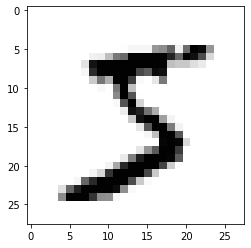

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(image.reshape(28,28), cmap='gray')

img = np.reshape(image,[28,28])
plt.imshow(img, cmap='Greys')

In [16]:
import torch.nn as nn
linear = nn.Linear(28*28,10,bias=True)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

In [23]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X,y in data_loader:
        X = X.view(-1,28*28)
        y = y
        
        hypothesis = linear(X)
        cost = criterion(hypothesis,y)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
    print('Epoch:', '%04d' %(epoch+1), 'cost=',"{:.9f}".format(avg_cost))
print("Finished")

Epoch: 0001 cost= 0.253509939
Epoch: 0002 cost= 0.253177106
Epoch: 0003 cost= 0.252740562
Epoch: 0004 cost= 0.252504230
Epoch: 0005 cost= 0.252294689
Epoch: 0006 cost= 0.252139807
Epoch: 0007 cost= 0.251762152
Epoch: 0008 cost= 0.251303077
Epoch: 0009 cost= 0.251098216
Epoch: 0010 cost= 0.250777781
Epoch: 0011 cost= 0.250646919
Epoch: 0012 cost= 0.250307411
Epoch: 0013 cost= 0.250108570
Epoch: 0014 cost= 0.249864832
Epoch: 0015 cost= 0.249656186
Finished


acc: 0.8611000180244446
Label: 1
Prediction: 1


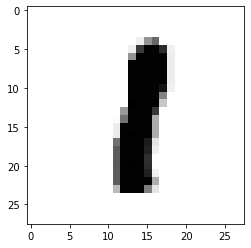

In [84]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    
    correct_prediction = torch.argmax(prediction,1)==y_test
    accuracy = correct_prediction.float().mean()
    print("acc:", accuracy.item())
    r = random.randint(0,len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float()
    y_single_data = mnist_test.test_labels[r:r+1]
    print('Label:',y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction:', torch.argmax(single_prediction,1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
    plt.show()
    

In [ ]:
# Neural Network - Deep Learning

In [94]:
# layering
# nn.Linear(784,10) 784->10
# 784 -> 256 -> 256 ->10
linear1 = nn.Linear(784,256,bias=True)
linear2 = nn.Linear(256,256,bias=True)
linear3 = nn.Linear(256,10, bias=True)
relu = torch.nn.ReLU()

In [95]:
nn.init.normal_(linear1.weight)
nn.init.normal_(linear2.weight)
nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-0.5721, -1.4248, -0.4780,  ...,  0.5584, -0.7993, -0.9324],
        [-0.0888,  2.3190,  0.0376,  ...,  0.8999,  1.1295, -0.1574],
        [ 1.3656,  0.3040, -0.2656,  ..., -0.6270, -1.4982,  1.0582],
        ...,
        [ 0.2267,  0.5228, -0.5428,  ...,  0.8518, -1.9667,  2.3593],
        [ 0.9745, -0.6624, -1.2493,  ...,  1.5282, -0.8254,  1.8908],
        [-0.1077, -2.2409, -0.0165,  ..., -0.4245,  0.5392,  0.3811]],
       requires_grad=True)

In [96]:
model = nn.Sequential(linear1,relu,relu,linear2,relu,linear3)

In [98]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
total_batch =len(data_loader)
train_epochs = 15
batch_size = 100
for epoch in range(train_epochs):
    avg_cost = 0
    for X,y in data_loader:
        X=X.view(-1,28*28)
        y= y
        optimizer.zero_grad()
        hyp = model(X)
        cost = criterion(hyp,y)
        cost.backward()
        optimizer.step()
        avg_cost+=cost/total_batch
    print('Epoch:', "%04d" % (epoch+1), 'cost=','{:0.9f}'.format(avg_cost))
print("End")

Epoch: 0001 cost= 150.471298218
Epoch: 0002 cost= 36.289150238
Epoch: 0003 cost= 22.104393005
Epoch: 0004 cost= 15.208435059
Epoch: 0005 cost= 11.028373718
Epoch: 0006 cost= 8.186825752
Epoch: 0007 cost= 6.080119133
Epoch: 0008 cost= 4.496963978
Epoch: 0009 cost= 3.259219170
Epoch: 0010 cost= 2.474679947
Epoch: 0011 cost= 1.742930293
Epoch: 0012 cost= 1.409151077
Epoch: 0013 cost= 1.060863614
Epoch: 0014 cost= 0.876866817
Epoch: 0015 cost= 0.709524095
End


acc: 0.9478999972343445
Label: 0
Prediction: 0


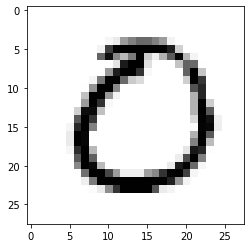

In [101]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = model(X_test)
    
    correct_prediction = torch.argmax(prediction,1)==y_test
    accuracy = correct_prediction.float().mean()
    print("acc:", accuracy.item())
    r = random.randint(0,len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float()
    y_single_data = mnist_test.test_labels[r:r+1]
    print('Label:',y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction:', torch.argmax(single_prediction,1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
    plt.show()
    